In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from utils import get_score_n_best_consecutive, get_score_n_after_peak
import os

matplotlib.rcParams["figure.dpi"] = 100
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams["font.family"] = "sans-serif"

In [2]:
FIG_SIZE = (6,4)
FIG_DIR = 'final-figures/'
FONTSIZE = 13

### Load data

In [3]:
results = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-mnist-sparse-rec-sparsity-search/search_results.csv', delimiter=';')

### Prepare performance data

In [4]:
# configuration for heatmap
sparsities = []
multiplier = 2
dimensionality = 5
last_layer_sparsity = 0.5
dynamic_eval_range = True
nr_lr_intervals_to_eval = 6
arr = np.zeros((dimensionality, dimensionality))

# function determining window that is used to average over accuracies of different learning rates
score_func = get_score_n_best_consecutive

# save aggregated performance values in array which serves as basis for the heatmap
metric_type = 'test'
for i in range(dimensionality):
    for j in range(dimensionality):
        s1 = i * multiplier / 10
        s2 = j * multiplier / 10
        sparsity = f"{round(s1, 2)},{round(s2, 2)},{last_layer_sparsity}"
        
        if dynamic_eval_range:
            score, _ = score_func(results[results['layer_max_sparsities'] == sparsity],
                               nr_lr_intervals_to_eval, f'task_{metric_type}_accu_last')
        else:
            selected_results = results[
                    (results['layer_max_sparsities'] == sparsity) &
                    ((results['lr'] >= eval_range[0]) & (results['lr'] <= eval_range[1]))
                ]
            score = selected_results.drop(columns=['layer_max_sparsities'])[f'task_{metric_type}_accu_last'].mean()
        
        arr[i, j] = score
    sparsities.append(sparsity)

### Plot heatmap

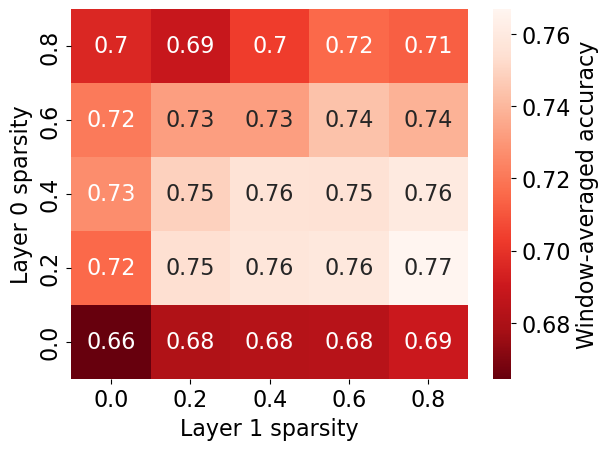

In [5]:
FONTSIZE = 16
ax = sns.heatmap(arr, xticklabels=[i * multiplier / 10 for i in range(dimensionality)],
                 yticklabels=[i * multiplier / 10 for i in range(dimensionality)], annot=True, cmap='Reds_r',
                 cbar_kws={'label': 'Window-averaged accuracy'}, annot_kws={"size": FONTSIZE})
plt.grid(False)
plt.ylim(0,dimensionality)
plt.xlim(0,dimensionality)
plt.xlabel('Layer 1 sparsity', fontsize=FONTSIZE)
plt.ylabel('Layer 0 sparsity', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=FONTSIZE)
ax.figure.axes[-1].yaxis.label.set_size(FONTSIZE)
plt.savefig(f'{FIG_DIR}sparsity-heatmap-domainIL.svg', format='svg', bbox_inches = "tight")